In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=  pd.read_csv('AirQuality.csv')
data.replace(-200, np.nan, inplace=True)
air= pd.DataFrame(data)
air.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,3/10/2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,3/11/2004,0:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,3/11/2004,1:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,3/11/2004,2:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,3/11/2004,3:00:00,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517


In [ ]:
selected_columns = air.columns[3:]

# Calculate mean with skipping missing data
mean_values = air[selected_columns].mean(skipna=True)

# Calculate variance with skipping missing data
variance_values = air[selected_columns].var(skipna=True)

# Calculate covariance with skipping missing data
covariance_matrix = air[selected_columns].cov(min_periods=1)

# Calculate correlation with skipping missing data
correlation_matrix = air[selected_columns].corr()

print("Mean values:")
print(mean_values)
print("\nVariance values:")
print(variance_values)
print("\nCovariance matrix:")
print(covariance_matrix)
print("\nCorrelation matrix:")
print(correlation_matrix)

Mean values:
PT08.S1(CO)      1056.813081
NMHC(GT)           21.373731
C6H6(GT)            9.688704
PT08.S2(NMHC)     902.418296
NOx(GT)           203.649567
PT08.S3(NOx)      802.813188
NO2(GT)            93.245592
PT08.S4(NO2)     1399.302661
PT08.S5(O3)       982.895052
T                  17.601325
RH                 47.308400
AH                  0.985417
dtype: float64

Variance values:
PT08.S1(CO)       90749.343959
NMHC(GT)           8299.845667
C6H6(GT)             57.150350
PT08.S2(NMHC)    101567.707865
NOx(GT)           46222.070322
PT08.S3(NOx)      89614.092075
NO2(GT)            3779.768238
PT08.S4(NO2)     194885.849387
PT08.S5(O3)      191908.879964
T                    87.567482
RH                  379.260169
AH                    0.196219
dtype: float64

Covariance matrix:
                 PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
PT08.S1(CO)     90749.343959  5852.362297  1790.220719   88526.730611   
NMHC(GT)         5852.362297  8299.845667   136.58581

Most correlated couple of features (by correlation):
         level_0   level_1  correlation
1  PT08.S2(NMHC)  C6H6(GT)     0.926235


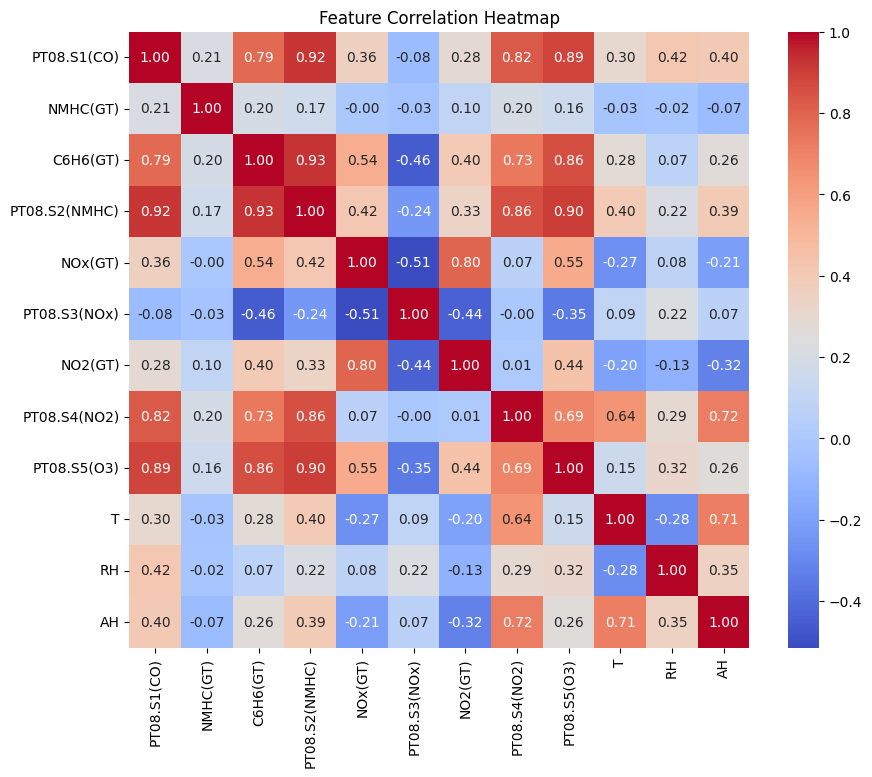

In [ ]:
most_correlated_couple = (correlation_matrix
                          .unstack()
                          .sort_values(ascending=False)
                          .drop_duplicates()
                          .reset_index()
                          .rename(columns={0: 'correlation'})
                          .query('level_0 != level_1')
                          .head(1))

print("Most correlated couple of features (by correlation):")
print(most_correlated_couple)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

PCA: Principal component analysis
Reduce the number of dimensions while retaining as much information as possible. Additionally, the new variables created through PCA are uncorrelated, which can be useful for downstream analysis

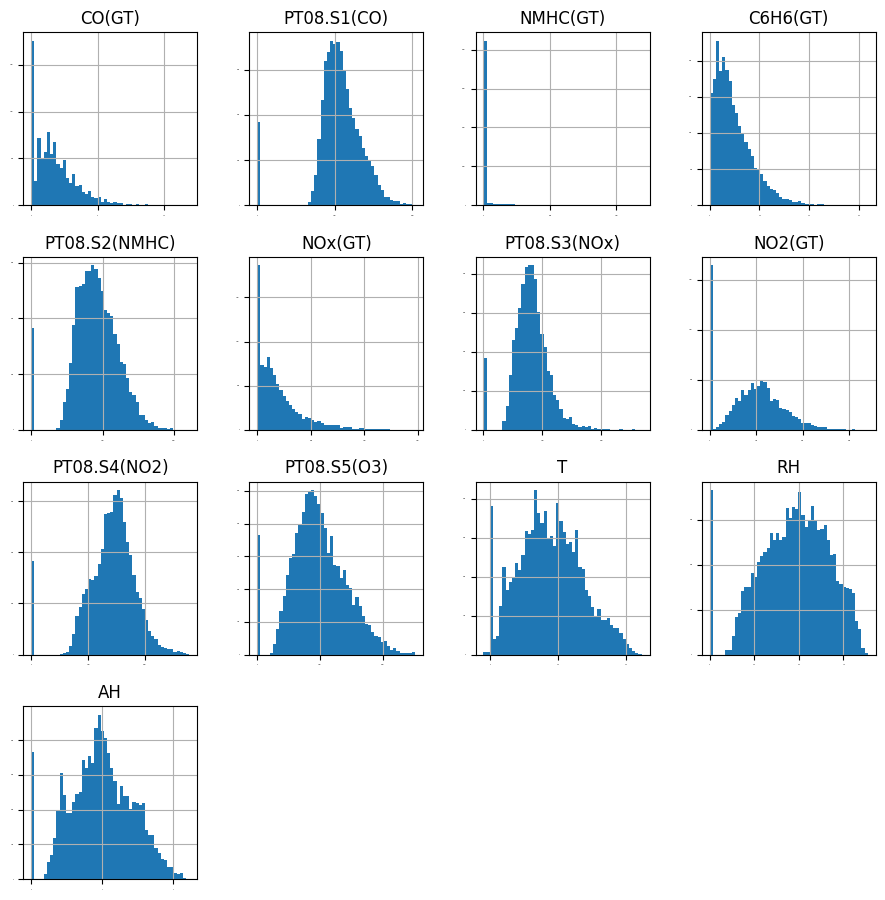

In [ ]:
ax = air.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))


<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200"> PCA</p>


In [ ]:
#Preprocessing: scaling
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Define the range of columns to scale
start_column = 'CO(GT)'
end_column = 'AH'
columns_to_scale = air.loc[:, start_column:end_column].columns

# Select the columns to scale
selected_columns = air[columns_to_scale] # Specify the columns you want to scale

# Select the columns to scale
selected_columns = air[columns_to_scale]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(selected_columns)

# Scale the imputed data using StandardScaler
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(imputed_data)

# Create a DataFrame from the scaled features
scaled_cols = pd.DataFrame(scaled_cols, columns=selected_columns.columns)

scaled_cols.head()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.339856,1.222702,-1.077427,0.248813,0.408519,-0.418252,0.875962,-0.002078,0.694669,0.627494,-0.544962,-0.019689,-0.676404
1,-0.116071,0.903123,-1.672415,-0.093547,0.060588,-0.743974,1.344717,-0.480235,0.302742,-0.130331,-0.579615,-0.090386,-0.758008
2,0.035905,1.420088,-2.048197,-0.148325,-0.000586,-0.599209,1.209652,0.020692,0.290955,0.130812,-0.741330,0.280772,-0.695605
3,0.035905,1.297897,-2.173458,-0.120936,0.033824,-0.387231,1.018972,0.202847,0.376413,0.461080,-0.845290,0.634256,-0.603390
4,-0.420023,0.809130,-2.627528,-0.490684,-0.394398,-0.599209,1.467865,0.066230,0.099412,0.222979,-0.822188,0.610691,-0.598084


Total number of principal components = 13
Explained Variance Ratio of each Principal Component:
[0.51518602 0.18802217 0.10309432 0.07108285 0.0407297  0.03375667
 0.0148175  0.01091961 0.00878746 0.00667696 0.00345649 0.00271528
 0.00075496]

Cumulative Explained Variance Ratio:
[0.51518602 0.70320819 0.80630251 0.87738536 0.91811507 0.95187174
 0.96668924 0.97760885 0.98639631 0.99307326 0.99652976 0.99924504
 1.        ]

Principal Components (Eigenvectors):
[[ 0.33770905  0.35986204  0.12572404  0.36718392  0.37189773  0.28205092
  -0.32512802  0.2598506   0.27925273  0.35842323  0.05627521  0.01051064
   0.07073515]
 [ 0.0951327   0.02016339 -0.04864906 -0.06081113 -0.07851566  0.30611911
   0.01737401  0.30306284 -0.38262001  0.08764967 -0.57781991  0.22601909
  -0.50340332]
 [ 0.03698622 -0.08577287  0.11541529  0.04253097  0.0619738  -0.01026193
   0.04867549  0.27710836 -0.14593788 -0.06766689  0.25581394 -0.79515878
  -0.41163834]
 [ 0.00718474  0.02042409  0.95940365 -0.0213

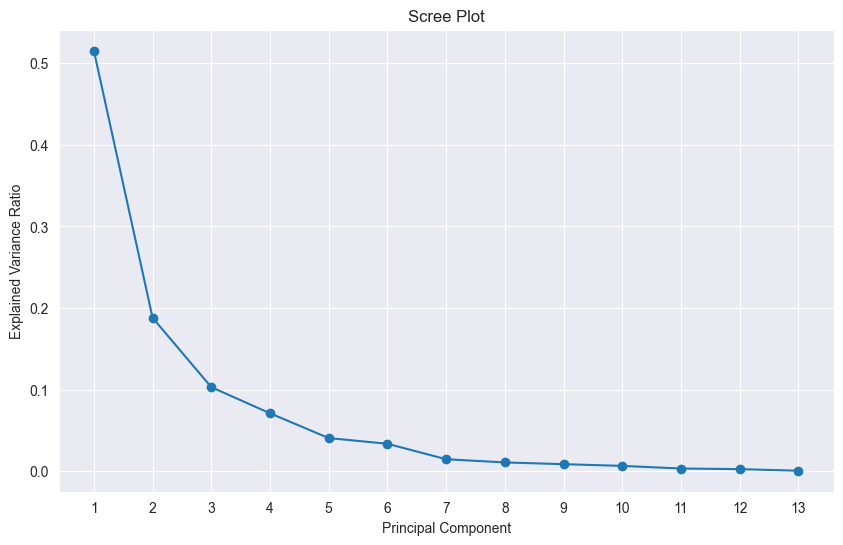

In [ ]:
from sklearn.decomposition import PCA
#fit the PCA model, which calculates the principal components and their corresponding eigenvalues.

# Create PCA object and fit the scaled data
pca = PCA()
pca.fit(scaled_cols)

# Transform the data to its principal components
X_pca = pca.transform(scaled_cols)

# Get the number of principal components
num_components = pca.n_components_

# Print the number of principal components
print(f"Total number of principal components = {num_components}")

# Print the explained variance ratio of each principal component
print("Explained Variance Ratio of each Principal Component:")
print(pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
print("\nCumulative Explained Variance Ratio:")
print(np.cumsum(pca.explained_variance_ratio_))

# You can also access the principal components (eigenvectors) and eigenvalues as follows:
print("\nPrincipal Components (Eigenvectors):")
print(pca.components_)

print("\nEigenvalues:")
print(pca.explained_variance_)

# Get the explained variance ratio of each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

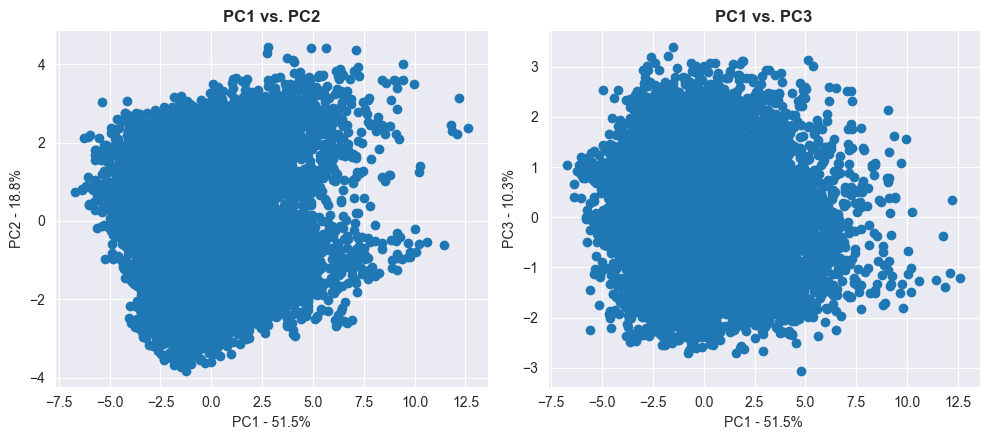

In [ ]:
#Dimensionality reduction
from sklearn.decomposition import PCA

# Assuming pca is a fitted PCA object
per_var = pca.explained_variance_ratio_
X_pca = pca.transform(scaled_cols)[:, :3]

# plot pca
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5))

# plot PCA1 vs PCA2
axs[0].scatter(X_pca[:,0], X_pca[:,1])
axs[0].set_title('PC1 vs. PC2', fontweight='bold')
axs[0].set_xlabel('PC1 - {0:.1f}%'.format(per_var[0]*100))
axs[0].set_ylabel('PC2 - {0:.1f}%'.format(per_var[1]*100))

# plot PCA1 vs PCA3
axs[1].scatter(X_pca[:,0], X_pca[:,2])
axs[1].set_title('PC1 vs. PC3', fontweight='bold')
axs[1].set_xlabel('PC1 - {0:.1f}%'.format(per_var[0]*100))
axs[1].set_ylabel('PC3 - {0:.1f}%'.format(per_var[2]*100))

# adjust the layout and show the figure
plt.tight_layout()
plt.show()

In [ ]:
used = []
corrs = []
for i, j in enumerate(correlation_matrix.columns):
    for k in range(len(correlation_matrix)):
        if ((correlation_matrix.iloc[k, i] > 0.9) & 
            (j not in used) &
            (j != correlation_matrix.index[k])):
            
            used.append(j)
            corrs.append((j, correlation_matrix.index[k], 
                          np.round(correlation_matrix.iloc[k, i], 2)))

            
corrsdf = pd.DataFrame([[i[0] for i in corrs],
                        [i[1] for i in corrs],
                        [i[2] for i in corrs]])

corrsdf = corrsdf.T.rename(columns = {0:'column',1:'row',2:'corr'})
corrsdf[:15]

,column,row,corr
0,PT08.S1(CO),PT08.S2(NMHC),0.92
1,C6H6(GT),PT08.S2(NMHC),0.93
2,PT08.S2(NMHC),PT08.S1(CO),0.92
3,PT08.S5(O3),PT08.S2(NMHC),0.9


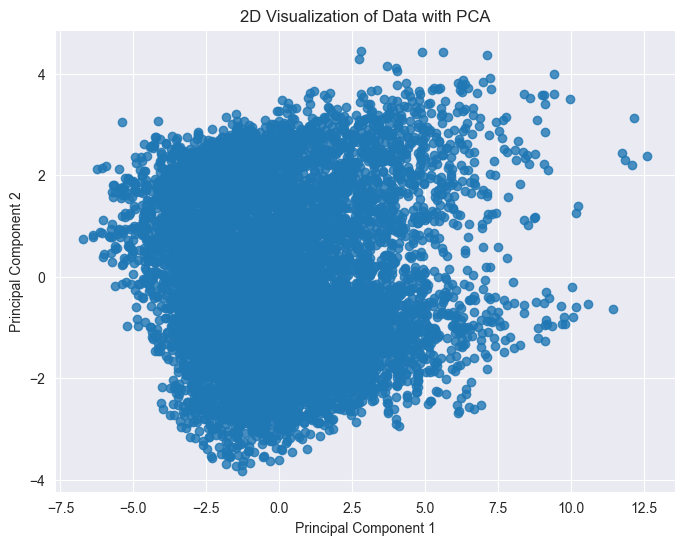

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_pca contains the transformed data with 2 principal components
# X_pca = pca.transform(X)  # Perform PCA before visualization

# Scatter plot of the data points in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.title('2D Visualization of Data with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()